In [1]:
# Import library
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import matplotlib

In [2]:
# Import dataset from GitHub
url = "https://github.com/Kennedy0904/WQD7005-DATA-MINING/blob/master/Mid_Term__20200611/pokemon.csv" 
try:
    page = requests.get(url, timeout = 5)
    if page.status_code == 200:
        soup = BeautifulSoup(page.content, 'lxml')
        table = soup.find("table", attrs = {"class": "js-csv-data csv-data js-file-line-container"})
        #df = pd.read_html(str(table))[0]
        
        pokemon_name = []
        pokemon_height = []
        pokemon_weight = []
        pokemon_type1 = []
        pokemon_type2 = []
        pokemon_hp = []
        pokemon_att = []
        pokemon_def = []
        pokemon_speed = []
        pokemon_spAtt = []
        pokemon_spDef = []
        pokemon_classification = []
        pokemon_generation = []
        pokemon_legendary = []

        for row in table.tbody.findAll('tr'):
            name = row.findAll('td')[31].text.strip()
            height = row.findAll('td')[28].text.strip()
            weight = row.findAll('td')[39].text.strip()
            type_1 = row.findAll('td')[37].text.strip()
            type_2 = row.findAll('td')[38].text.strip()
            hp = row.findAll('td')[29].text.strip()
            att = row.findAll('td')[20].text.strip()
            defend = row.findAll('td')[26].text.strip()
            speed = row.findAll('td')[36].text.strip()
            spAtt = row.findAll('td')[34].text.strip()
            spDef = row.findAll('td')[35].text.strip()
            classification = row.findAll('td')[25].text.strip()
            generation = row.findAll('td')[40].text.strip()
            legendary = row.findAll('td')[41].text.strip()

            #https://stackoverflow.com/questions/12256823/taking-the-text-output-when-table-cell-value-is-blank-in-python-beautifulsoup
            pokemon_name.append(name if name else np.nan)
            pokemon_height.append(height if height else np.nan)
            pokemon_weight.append(weight if weight else np.nan)
            pokemon_type1.append(type_1 if type_1 else np.nan)
            pokemon_type2.append(type_2 if type_2 else np.nan)
            pokemon_hp.append(hp if hp else np.nan)
            pokemon_att.append(att if att else np.nan)
            pokemon_def.append(defend if defend else np.nan)
            pokemon_speed.append(speed if speed else np.nan)
            pokemon_spAtt.append(spAtt if spAtt else np.nan)
            pokemon_spDef.append(spDef if spDef else np.nan)
            pokemon_classification.append(classification if classification else np.nan)
            pokemon_generation.append(generation if generation else np.nan)
            pokemon_legendary.append(legendary if legendary else np.nan)
            
        # intialise data of lists. 
        data = {'Name' : pokemon_name, 
                'Height': pokemon_height,
                'Weight' : pokemon_weight,
                'Type_1' : pokemon_type1, 
                'Type_2': pokemon_type2,
                'HP' : pokemon_hp,
                'Attack' : pokemon_att, 
                'Defense': pokemon_def,
                'Speed' : pokemon_speed,
                'Special_Attack' : pokemon_spAtt, 
                'Special_Defense': pokemon_spDef,
                'Classification' : pokemon_classification, 
                'Generation': pokemon_generation,
                #'isLegendary' : pokemon_legendary,
               } 
        
        # Create DataFrame 
        df = pd.DataFrame(data) 
        
    else: 
        print(str(page.status_code) + " - Error, page not found.")
except requests.ConnectionError as e:
    print('Connection error')
    print(str(e))

In [3]:
# Dataset
df

,Name,Height,Weight,Type_1,Type_2,HP,Attack,Defense,Speed,Special_Attack,Special_Defense,Classification,Generation
0,Bulbasaur,0.7,6.9,grass,poison,45,49,49,45,65,65,Seed Pokémon,1
1,Ivysaur,1.0,13.0,grass,poison,60,62,63,60,80,80,Seed Pokémon,1
2,Venusaur,2.0,100.0,grass,poison,80,100,123,80,122,120,Seed Pokémon,1
3,Charmander,0.6,8.5,fire,NaN,39,52,43,65,60,50,Lizard Pokémon,1
4,Charmeleon,1.1,19.0,fire,NaN,58,64,58,80,80,65,Flame Pokémon,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Celesteela,9.2,999.9,steel,flying,97,101,103,61,107,101,Launch Pokémon,7
797,Kartana,0.3,0.1,grass,steel,59,181,131,109,59,31,Drawn Sword Pokémon,7
798,Guzzlord,5.5,888.0,dark,dragon,223,101,53,43,97,53,Junkivore Pokémon,7
799,Necrozma,2.4,230.0,psychic,NaN,97,107,101,79,127,89,Prism Pokémon,7


In [4]:
# Check missing value
df.isnull().sum()

Name                 0
Height              20
Weight              20
Type_1               0
Type_2             384
HP                   0
Attack               0
Defense              0
Speed                0
Special_Attack       0
Special_Defense      0
Classification       0
Generation           0
dtype: int64

In [5]:
# Check duplicated row
df.duplicated().sum()

0

In [6]:
# Check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             801 non-null    object
 1   Height           781 non-null    object
 2   Weight           781 non-null    object
 3   Type_1           801 non-null    object
 4   Type_2           417 non-null    object
 5   HP               801 non-null    object
 6   Attack           801 non-null    object
 7   Defense          801 non-null    object
 8   Speed            801 non-null    object
 9   Special_Attack   801 non-null    object
 10  Special_Defense  801 non-null    object
 11  Classification   801 non-null    object
 12  Generation       801 non-null    object
dtypes: object(13)
memory usage: 81.5+ KB


## Data Cleaning

In [7]:
int_cols = ['HP', 'Attack', 'Defense', 'Speed', 'Special_Attack', 'Special_Defense']
for column in int_cols:
    df[column] =  df[column].astype(int)

In [8]:
float_cols = ['Height', 'Weight']
for column in float_cols:
    df[column] =  df[column].astype(float)

In [9]:
# Check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             801 non-null    object 
 1   Height           781 non-null    float64
 2   Weight           781 non-null    float64
 3   Type_1           801 non-null    object 
 4   Type_2           417 non-null    object 
 5   HP               801 non-null    int32  
 6   Attack           801 non-null    int32  
 7   Defense          801 non-null    int32  
 8   Speed            801 non-null    int32  
 9   Special_Attack   801 non-null    int32  
 10  Special_Defense  801 non-null    int32  
 11  Classification   801 non-null    object 
 12  Generation       801 non-null    object 
dtypes: float64(2), int32(6), object(5)
memory usage: 62.7+ KB


In [10]:
# Describe Dataset
df.describe([.25, .50, .75, .90, .95, .99])[['Height', 'Weight']]

,Height,Weight
count,781.000000,781.000000
mean,1.163892,61.378105
std,1.080326,109.354766
min,0.100000,0.100000
25%,0.600000,9.000000
50%,1.000000,27.300000
75%,1.500000,64.800000
90%,2.000000,150.000000
95%,2.500000,230.000000
99%,5.560000,514.000000


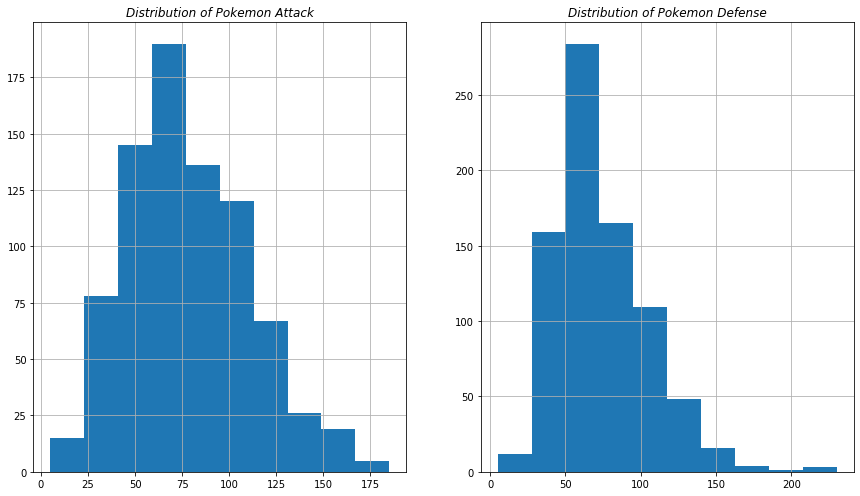

In [11]:
# Plot distribution of pokemon attack and defense
fig,axes = plt.subplots(1,2,figsize = (14.70, 8.27))
df['Attack'].hist(ax = axes[0])
axes[0].set_title('Distribution of Pokemon Attack', fontsize = 12, style = 'italic')
df['Defense'].hist(ax = axes[1])
axes[1].set_title('Distribution of Pokemon Defense', fontsize = 12, style = 'italic');

### Before Data Cleaning

#### Pokemon Height & Weight

In [12]:
# Group height value
heightGroup = pd.cut(df['Height'], [0, 0.5, 1, 1.5, 2, 5, 15],
                     labels = ['0.1 - 0.5', '0.6 - 1.0', '1.1 - 1.5', '1.6 - 2.0', '2.1 - 5.0', '> 5.0']) \
                        .value_counts().sort_index()
heightGroup

0.1 - 0.5    194
0.6 - 1.0    239
1.1 - 1.5    185
1.6 - 2.0    103
2.1 - 5.0     49
> 5.0         11
Name: Height, dtype: int64

In [13]:
# Group weight value
weightGroup = pd.cut(df['Weight'], [0, 10.0, 25.0, 50.0, 100.0, 250.0, 550.0],
                     labels = ['0.1 - 10.0', '10.1 - 25.0', '25.1 - 50.0', '50.1 - 100.0', '100.1 - 250.0', '> 250.0']) \
                        .value_counts().sort_index()
weightGroup

0.1 - 10.0       213
10.1 - 25.0      164
25.1 - 50.0      150
50.1 - 100.0     135
100.1 - 250.0     84
> 250.0           28
Name: Weight, dtype: int64

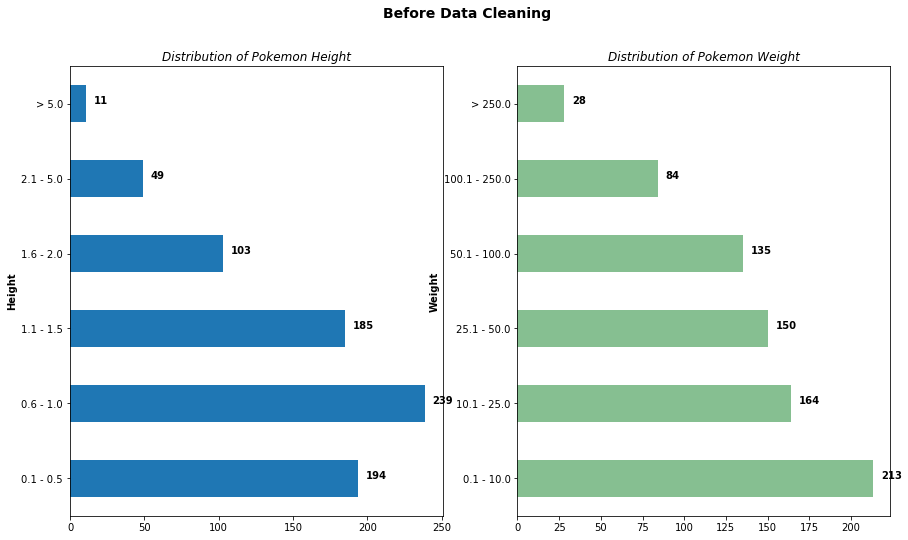

In [14]:
# Plot distribution of pokemon height and weight
fig,axes = plt.subplots(1,2,figsize = (14.70, 8.27))
heightGroup.plot.barh(ax = axes[0])
axes[0].set_title('Distribution of Pokemon Height', fontsize = 12, style = 'italic')
axes[0].set_ylabel('Height', fontsize = 10, weight = 'bold');
#https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
for i, v in enumerate(heightGroup.values):
    axes[0].text(v + 5, i, str(v), color='black', fontweight='bold')
weightGroup.plot.barh(ax = axes[1], color='#86bf91')
axes[1].set_title('Distribution of Pokemon Weight', fontsize = 12, style = 'italic')
axes[1].set_ylabel('Weight', fontsize = 10, weight = 'bold');
for i, v in enumerate(weightGroup.values):
    axes[1].text(v + 5, i, str(v), color='black', fontweight='bold')
fig.suptitle('Before Data Cleaning', fontsize = 14, weight = 'bold');

#### Pokemon Type 2

In [15]:
type2_count = df['Type_2'].value_counts()
type2_count

flying      95
ground      34
poison      34
fairy       29
psychic     29
fighting    25
steel       22
dark        21
grass       20
water       17
dragon      17
ice         15
ghost       14
rock        14
fire        13
electric     9
bug          5
normal       4
Name: Type_2, dtype: int64

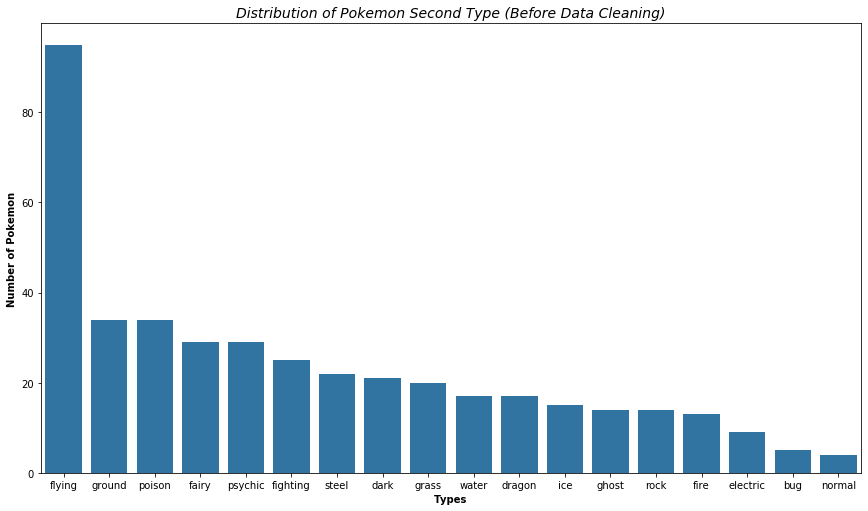

In [16]:
# Plot distribution of pokemon second type
plt.figure(figsize=(14.70, 8.27))
ax = sns.barplot(x = type2_count.index,
                 y = type2_count.values,
                 color = sns.color_palette()[0])
ax.set_title("Distribution of Pokemon Second Type (Before Data Cleaning)", size = 14, style = 'italic')
ax.set_xlabel("Types", weight = 'bold');
ax.set_ylabel("Number of Pokemon", weight = 'bold');

### After Data Cleaning

#### Pokemon Height & Weight

In [17]:
# Replace missing value in Height & Weight with average
columns = ['Height', 'Weight']
for col in columns:
    avg = round(df[col].mean(), 2)
    df[col].fillna(avg, inplace = True)

In [18]:
# Group height value
heightGroup = pd.cut(df['Height'], [0, 0.5, 1, 1.5, 2, 5, 15],
                     labels = ['0.1 - 0.5', '0.6 - 1.0', '1.1 - 1.5', '1.6 - 2.0', '2.1 - 5.0', '> 5.0']) \
                        .value_counts().sort_index()
heightGroup

0.1 - 0.5    194
0.6 - 1.0    239
1.1 - 1.5    205
1.6 - 2.0    103
2.1 - 5.0     49
> 5.0         11
Name: Height, dtype: int64

In [19]:
# Group weight value
weightGroup = pd.cut(df['Weight'], [0, 10.0, 25.0, 50.0, 100.0, 250.0, 550.0],
                     labels = ['0.1 - 10.0', '10.1 - 25.0', '25.1 - 50.0', '50.1 - 100.0', '100.1 - 250.0', '> 250.0']) \
                        .value_counts().sort_index()
weightGroup

0.1 - 10.0       213
10.1 - 25.0      164
25.1 - 50.0      150
50.1 - 100.0     155
100.1 - 250.0     84
> 250.0           28
Name: Weight, dtype: int64

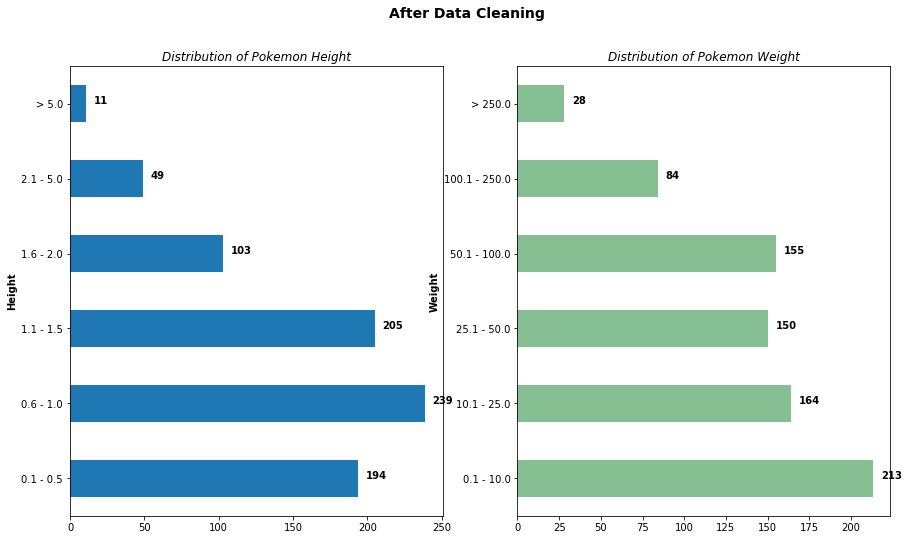

In [20]:
# Plot distribution of pokemon height and weight
fig,axes = plt.subplots(1,2,figsize = (14.70, 8.27))
heightGroup.plot.barh(ax = axes[0])
axes[0].set_title('Distribution of Pokemon Height', fontsize = 12, style = 'italic')
axes[0].set_ylabel('Height', fontsize = 10, weight = 'bold');
for i, v in enumerate(heightGroup.values):
    axes[0].text(v + 5, i, str(v), color='black', fontweight='bold')
weightGroup.plot.barh(ax = axes[1], color='#86bf91')
axes[1].set_title('Distribution of Pokemon Weight', fontsize = 12, style = 'italic')
axes[1].set_ylabel('Weight', fontsize = 10, weight = 'bold');
for i, v in enumerate(weightGroup.values):
    axes[1].text(v + 5, i, str(v), color='black', fontweight='bold')
fig.suptitle('After Data Cleaning', fontsize = 14, weight = 'bold');

#### Pokemon Type 2

In [21]:
# Replace missing value in Type_2 with None
df['Type_2'].fillna(value='None', inplace=True)

In [22]:
type2_count = df['Type_2'].value_counts()
type2_count

None        384
flying       95
ground       34
poison       34
fairy        29
psychic      29
fighting     25
steel        22
dark         21
grass        20
water        17
dragon       17
ice          15
ghost        14
rock         14
fire         13
electric      9
bug           5
normal        4
Name: Type_2, dtype: int64

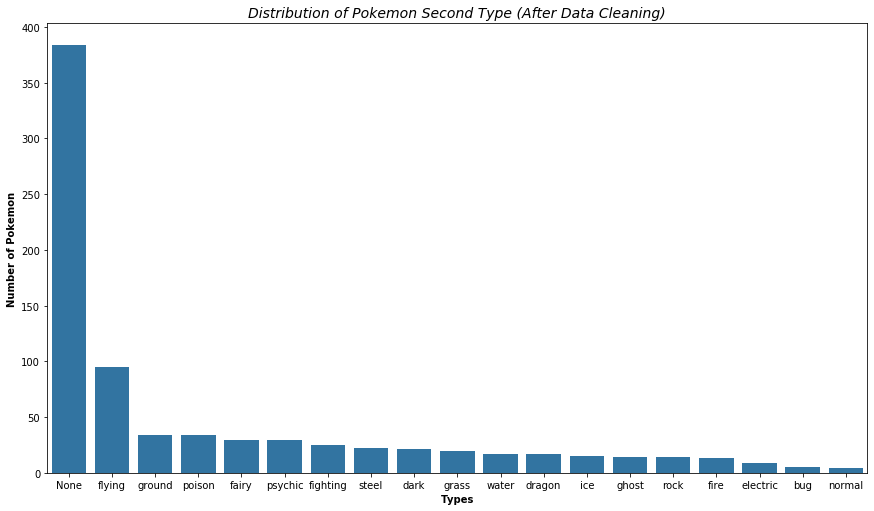

In [23]:
# Plot distribution of pokemon second type
plt.figure(figsize=(14.70, 8.27))
ax = sns.barplot(x = type2_count.index,
                 y = type2_count.values,
                 color = sns.color_palette()[0])
ax.set_title("Distribution of Pokemon Second Type (After Data Cleaning)", size = 14, style = 'italic')
ax.set_xlabel("Types", weight = 'bold');
ax.set_ylabel("Number of Pokemon", weight = 'bold');

## Data Integration

### Before Integration

In [24]:
# Count of each generation
generationCount = df['Generation'].value_counts().sort_index()
generationCount

1    151
2    100
3    135
4    107
5    156
6     72
7     80
Name: Generation, dtype: int64

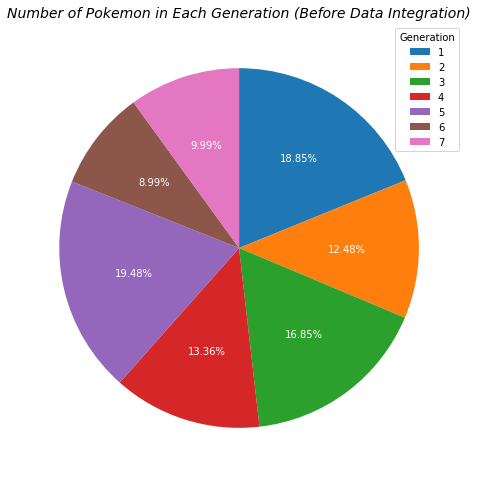

In [25]:
# Pie to show distribution of generation
plt.figure(figsize=[14.70, 8.27])
plt.pie(generationCount, startangle = 90, autopct= '%1.2f%%', counterclock = False, textprops={'color':'white'});
plt.legend(generationCount.index,
           title='Generation', 
           loc='upper right')
plt.title('Number of Pokemon in Each Generation (Before Data Integration)', fontsize = 14,  style = 'italic');

### After Integration

In [26]:
# Import another dataset
df_2 = pd.read_csv('pokemon_gen_8.csv')

In [27]:
# Columns name of first dataset
df.columns

Index(['Name', 'Height', 'Weight', 'Type_1', 'Type_2', 'HP', 'Attack',
       'Defense', 'Speed', 'Special_Attack', 'Special_Defense',
       'Classification', 'Generation'],
      dtype='object')

In [28]:
# Columns name of second dataset
df_2.columns

Index(['No.', 'Name', 'Ability1', 'Ability2', 'Hidden_Ability', 'Type1',
       'Type2', 'HP', 'Att', 'Def', 'S.Att', 'S.Def', 'Spd', 'Weight_kg',
       'Height_m', 'Weight_lbs', 'Height_ft', 'Cap_Rate', 'Egg_Steps',
       'Classification'],
      dtype='object')

In [29]:
# Extract selected columns from second dataset
df_gen8 = df_2.loc[:, ['Name', 'Height_m', 'Weight_kg', 'Type1', 'Type2', 'HP', 'Att', 'Def', 'Spd', 'S.Att', 'S.Def', 'Classification']]
df_gen8.rename(columns={'Height_m':'Height', 
                     'Weight_kg':'Weight',
                     'Type1':'Type_1',
                     'Type2':'Type_2',
                     'Att':'Attack',
                     'Def':'Defense',
                     'Spd':'Speed',
                     'S.Att':'Special_Attack',
                     'S.Def':'Special_Defense'}, inplace = True)
df_gen8['Generation'] = '8'

In [30]:
# Explore second dataset
df_gen8

,Name,Height,Weight,Type_1,Type_2,HP,Attack,Defense,Speed,Special_Attack,Special_Defense,Classification,Generation
0,Grookey,0.3,5.0,grass,NaN,50,65,50,65,40,40,Chimp Pokémon,8
1,Thwackey,0.7,14.0,grass,NaN,70,85,70,80,55,60,Beat Pokémon,8
2,Rillaboom,2.1,90.0,grass,NaN,100,125,90,85,60,70,Drummer Pokémon,8
3,Scorbunny,0.3,4.5,fire,NaN,50,71,40,69,40,40,Rabbit Pokémon,8
4,Raboot,0.6,9.0,fire,NaN,65,86,60,94,55,60,Rabbit Pokémon,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Drakloak,1.4,11.0,dragon,ghost,68,80,50,102,60,50,Caretaker Pokémon,8
396,Dragapult,3.0,50.0,dragon,ghost,88,120,75,142,100,75,Stealth Pokémon,8
397,Zacian,2.8,110.0,fairy,NaN,92,130,115,138,80,115,Warrior Pokémon,8
398,Zamazenta,2.9,210.0,fighting,NaN,92,130,115,138,80,115,Warrior Pokémon,8


In [31]:
# Concat first and second dataset
new_df = pd.concat([df, df_gen8], ignore_index=True)
new_df

,Name,Height,Weight,Type_1,Type_2,HP,Attack,Defense,Speed,Special_Attack,Special_Defense,Classification,Generation
0,Bulbasaur,0.7,6.9,grass,poison,45,49,49,45,65,65,Seed Pokémon,1
1,Ivysaur,1.0,13.0,grass,poison,60,62,63,60,80,80,Seed Pokémon,1
2,Venusaur,2.0,100.0,grass,poison,80,100,123,80,122,120,Seed Pokémon,1
3,Charmander,0.6,8.5,fire,None,39,52,43,65,60,50,Lizard Pokémon,1
4,Charmeleon,1.1,19.0,fire,None,58,64,58,80,80,65,Flame Pokémon,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,Drakloak,1.4,11.0,dragon,ghost,68,80,50,102,60,50,Caretaker Pokémon,8
1197,Dragapult,3.0,50.0,dragon,ghost,88,120,75,142,100,75,Stealth Pokémon,8
1198,Zacian,2.8,110.0,fairy,NaN,92,130,115,138,80,115,Warrior Pokémon,8
1199,Zamazenta,2.9,210.0,fighting,NaN,92,130,115,138,80,115,Warrior Pokémon,8


In [32]:
# Concatenated dataset info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1201 non-null   object 
 1   Height           1201 non-null   float64
 2   Weight           1201 non-null   float64
 3   Type_1           1201 non-null   object 
 4   Type_2           1007 non-null   object 
 5   HP               1201 non-null   int64  
 6   Attack           1201 non-null   int64  
 7   Defense          1201 non-null   int64  
 8   Speed            1201 non-null   int64  
 9   Special_Attack   1201 non-null   int64  
 10  Special_Defense  1201 non-null   int64  
 11  Classification   1201 non-null   object 
 12  Generation       1201 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 122.1+ KB


In [33]:
# Fix missing value in Type_2 column
new_df['Type_2'].fillna(value='None', inplace=True)

In [34]:
# Count of each generation
generationCount = new_df['Generation'].value_counts().sort_index()
generationCount

1    151
2    100
3    135
4    107
5    156
6     72
7     80
8    400
Name: Generation, dtype: int64

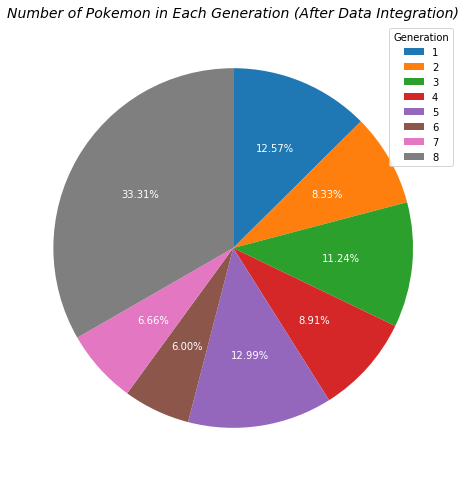

In [35]:
# Pie to show distribution of generation
plt.figure(figsize=[14.70, 8.27])
plt.pie(generationCount, startangle = 90, autopct= '%1.2f%%', counterclock = False, textprops={'color':'white'});
plt.legend(generationCount.index,
           title='Generation', 
           loc='upper right')
plt.title('Number of Pokemon in Each Generation (After Data Integration)', fontsize = 14,  style = 'italic');

## Data Transformation

### Before Normalization

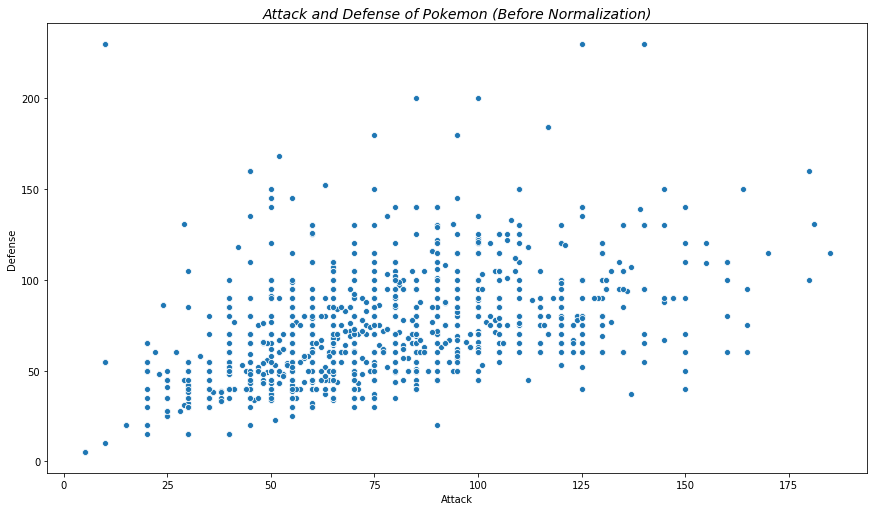

In [36]:
plt.figure(figsize=[14.70, 8.27])
sns.scatterplot(x = new_df['Attack'],
                y = new_df['Defense'])
plt.title('Attack and Defense of Pokemon (Before Normalization)', size = 14, style = 'italic');

### After Normalization

In [37]:
# Normalization
x = new_df.loc[:, ['Attack','Defense']].values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
#min_max_scaler.fit_transform(new_df[['Attack','Defense']]) --> Working too

In [38]:
x_scaled

array([[0.24444444, 0.19555556],
       [0.31666667, 0.25777778],
       [0.52777778, 0.52444444],
       ...,
       [0.69444444, 0.48888889],
       [0.69444444, 0.48888889],
       [0.44444444, 0.4       ]])

In [39]:
# Unzipping values
#https://www.geeksforgeeks.org/zip-in-python/
pokemonAttack, pokemonDefense = zip(*x_scaled) 

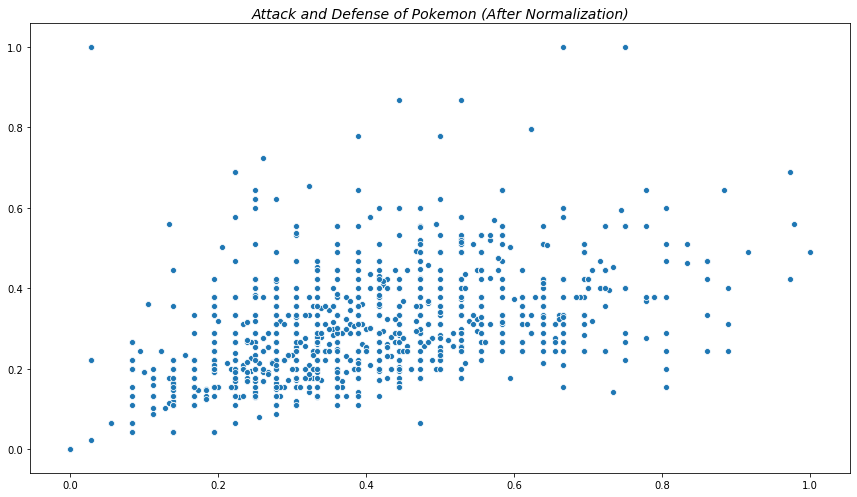

In [40]:
plt.figure(figsize=[14.70, 8.27])
sns.scatterplot(x = pokemonAttack,
                y = pokemonDefense)
plt.title('Attack and Defense of Pokemon (After Normalization)', size = 14, style = 'italic');

Range of X and Y axis now are between 0 to 1 after normalization.

### Before Aggregation

In [41]:
# Average of Pokemon Special_Attack & Special_Defense
sp_AttDef = new_df[['Special_Attack', 'Special_Defense']].mean()
sp_AttDef

Special_Attack     69.244796
Special_Defense    70.222315
dtype: float64

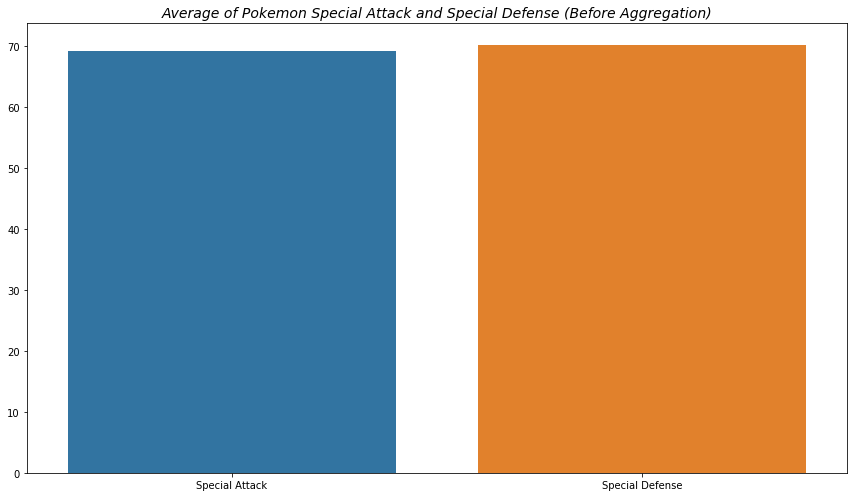

In [42]:
# Plot average of Special_Attack & Special_Defense
plt.figure(figsize=[14.70, 8.27])
sns.barplot(x = sp_AttDef.index,
            y = sp_AttDef.values)
plt.title('Average of Pokemon Special Attack and Special Defense (Before Aggregation)', size = 14, style = 'italic')
plt.xticks(ticks = range(len(sp_AttDef)), labels = ['Special Attack', 'Special Defense']);

### After Aggregation

In [43]:
sp_AttDef = new_df.groupby('Generation').agg('mean')[['Special_Attack', 'Special_Defense']]
sp_AttDef

,Special_Attack,Special_Defense
Generation,,
1,69.403974,67.741722
2,65.400000,73.440000
3,71.562963,69.392593
4,74.635514,74.523364
5,69.974359,67.711538
6,76.569444,73.194444
7,75.250000,75.650000
8,65.117500,68.842500


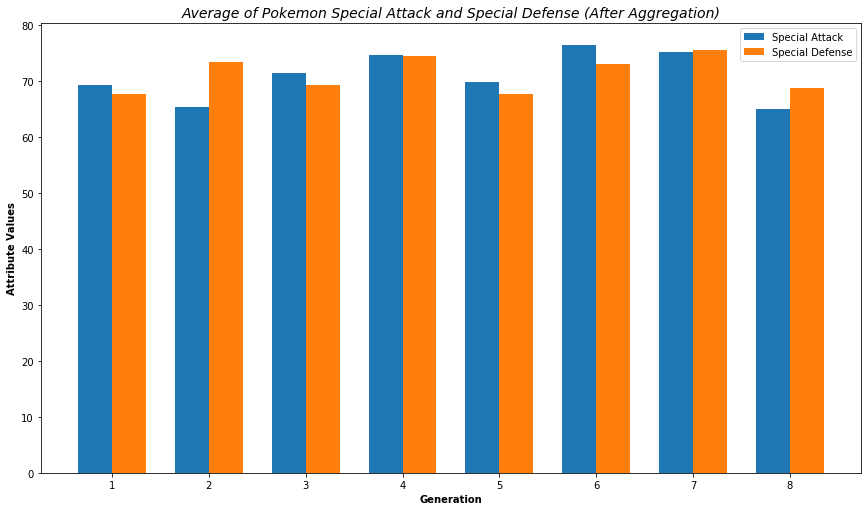

In [44]:
# Plot average of Special_Attack & Special_Defense
#https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
#https://python-graph-gallery.com/11-grouped-barplot/
labels = sp_AttDef.index
spAtt_means = sp_AttDef['Special_Attack']
spDef_means = sp_AttDef['Special_Defense']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[14.70, 8.27])
rects1 = ax.bar(x - width/2, spAtt_means, width, label='Special Attack')
rects2 = ax.bar(x + width/2, spDef_means, width, label='Special Defense')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Generation', weight = 'bold')
ax.set_ylabel('Attribute Values', weight = 'bold')
ax.set_title('Average of Pokemon Special Attack and Special Defense (After Aggregation)', size = 14, style = 'italic')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

## Data Reduction

### Before Principle Component Analysis

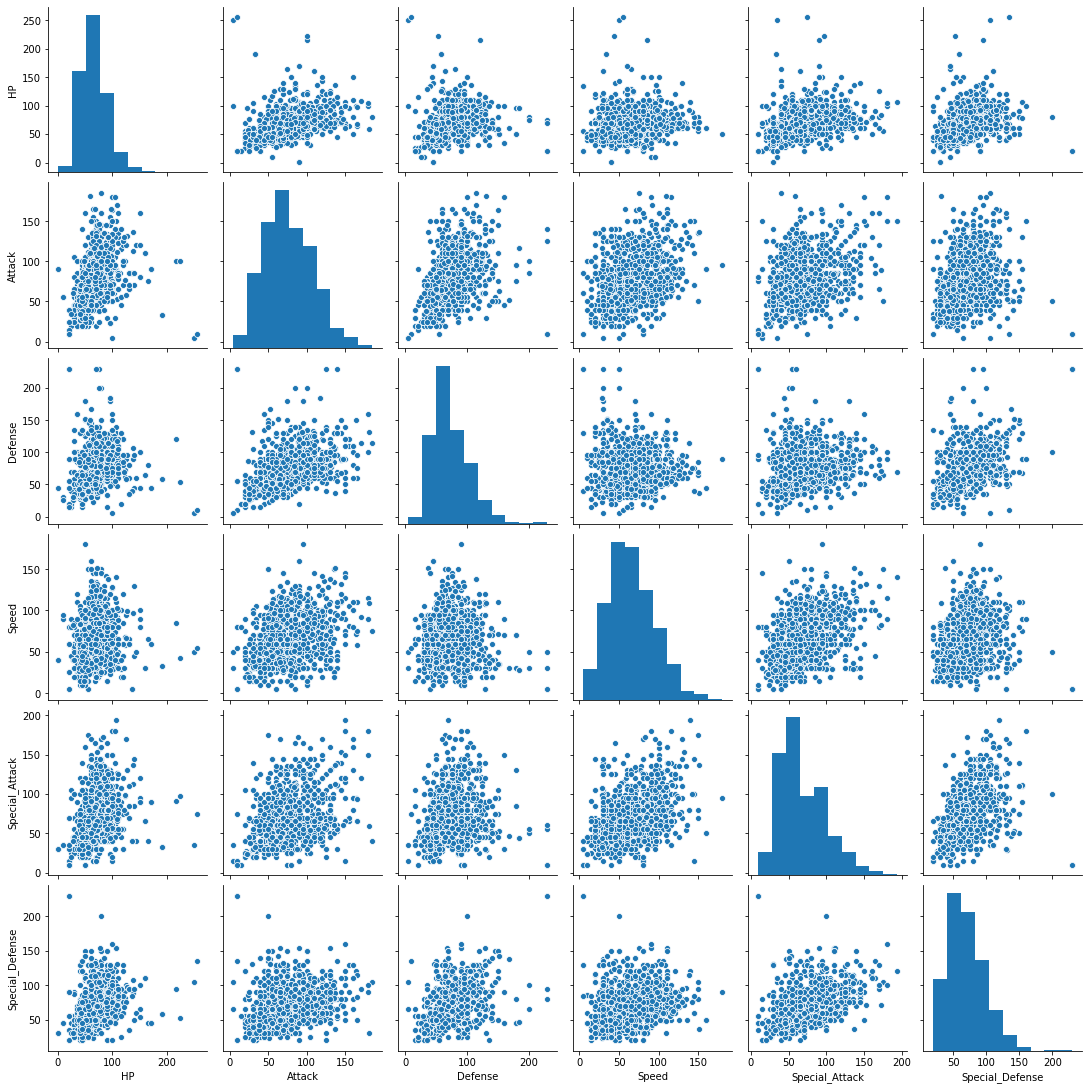

In [45]:
features = ['HP', 'Attack', 'Defense', 'Speed', 'Special_Attack', 'Special_Defense']
sns.pairplot(new_df.loc[:, features]);

### After Principle Component Analysis

In [46]:
# Standardize the data
# Separating out the features
x = new_df.loc[:, features].values
y = new_df.loc[:,['Type_1']].values

# Standardizing the features
x_scaled = StandardScaler().fit_transform(x)

In [47]:
# Dimension reduction process using Principle Component Analysis (PCA)
# PCA Projection to 2D
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
pca_DF = pd.DataFrame(data = principalComponents, 
                           columns = ['pca1', 
                                      'pca2'])
pca_DF = pd.concat([pca_DF, new_df[['Type_1']]], axis = 1)
pca_DF

,pca1,pca2,Type_1
0,-40.890725,-4.684904,grass
1,-6.108312,-7.837201,grass
2,86.102019,10.004388,grass
3,-46.729376,-20.931213,fire
4,-8.305690,-25.561849,fire
...,...,...,...
1196,-9.675193,-36.565961,dragon
1197,67.660664,-54.543687,dragon
1198,96.281125,-11.839228,fairy
1199,96.281125,-11.839228,fighting


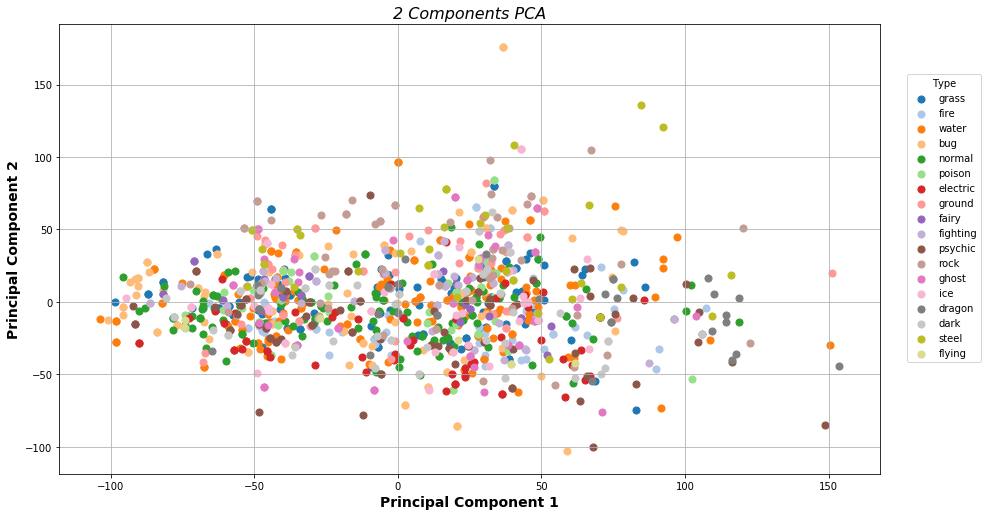

In [48]:
# Visualize 2D Projection
fig = plt.figure(figsize = (14.70, 8.27))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 14, weight = 'bold')
ax.set_ylabel('Principal Component 2', fontsize = 14, weight = 'bold')
ax.set_title('2 Components PCA', fontsize = 16, style = 'italic')
types = pca_DF['Type_1'].unique()
tab20 = matplotlib.cm.get_cmap('tab20')
for i, type in enumerate(types):
    indicesToKeep = pca_DF['Type_1'] == type  
    ax.scatter(pca_DF.loc[indicesToKeep, 'pca1'], 
               pca_DF.loc[indicesToKeep, 'pca2'],
               color=tab20(i), 
               s = 50)
ax.legend(title = 'Type', labels = types, bbox_to_anchor=(1.13, 0.9))
ax.grid()